In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
jan = pd.read_csv("/content/drive/MyDrive/Sales_January_2019.csv")
feb = pd.read_csv("/content/drive/MyDrive/Sales_February_2019.csv")
mar = pd.read_csv("/content/drive/MyDrive/Sales_March_2019.csv")
apr = pd.read_csv("/content/drive/MyDrive/Sales_April_2019.csv")
may = pd.read_csv("/content/drive/MyDrive/Sales_May_2019.csv")
jun = pd.read_csv("/content/drive/MyDrive/Sales_June_2019.csv")
jul = pd.read_csv("/content/drive/MyDrive/Sales_July_2019.csv")
aug = pd.read_csv("/content/drive/MyDrive/Sales_August_2019.csv")
sep = pd.read_csv("/content/drive/MyDrive/Sales_September_2019.csv")
oct = pd.read_csv("/content/drive/MyDrive/Sales_October_2019.csv")
nov = pd.read_csv("/content/drive/MyDrive/Sales_November_2019.csv")
dec = pd.read_csv("/content/drive/MyDrive/Sales_December_2019.csv")

**DATA CLEANING**

In [3]:
df = pd.concat([jan,feb,mar,apr,jun,jul,aug,sep,oct,nov,dec])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [4]:
df.shape

(170215, 6)

In [5]:
df.isnull().sum()

Order ID            497
Product             497
Quantity Ordered    497
Price Each          497
Order Date          497
Purchase Address    497
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,169718,169718,169718,169718,169718,169718
unique,162612,20,10,24,129732,130798
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,322,20019,153575,20019,322,322


In [8]:
df['Months'] = df['Order Date'].str[0:2]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01


In [9]:
df = df[df['Order Date'].str[0:2] != "Or"]

In [10]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype(int)
df['Price Each'] = df['Price Each'].astype(float)

**DATA VISUALISATION**

Product Sale per month

In [11]:
df['Sales'] = df['Price Each'] * df['Quantity Ordered']

In [12]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99


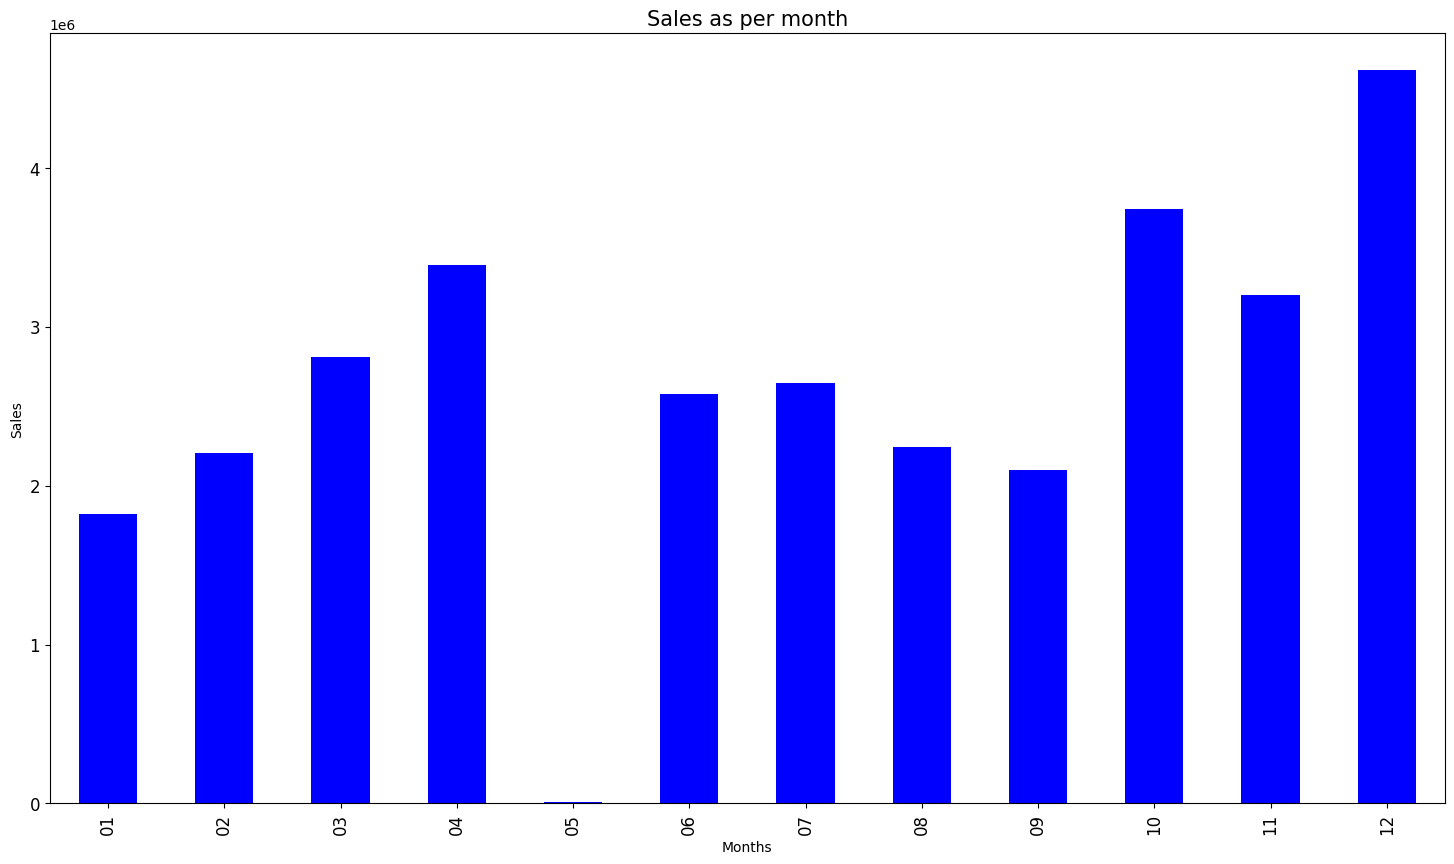

In [13]:
df1 = pd.DataFrame(df,columns = ['Months','Sales'])
sales = df1.groupby('Months').sum()['Sales']
sales.plot(kind = 'bar' , color = 'blue', figsize = (18, 10), fontsize = 12)
plt.title("Sales as per month", fontsize = 15)
plt.xlabel("Months", fontsize = 10)
plt.ylabel("Sales", fontsize = 10)
plt.show()

Best selling product

In [14]:
bsp = df.groupby('Product').sum().sort_values(by= "Quantity Ordered", ascending = False)
bsp = bsp.drop(['Price Each', 'Sales'] , axis = 1)
top = bsp.head(10)

<ipython-input-14-64065d32f4e4>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bsp = df.groupby('Product').sum().sort_values(by= "Quantity Ordered", ascending = False)


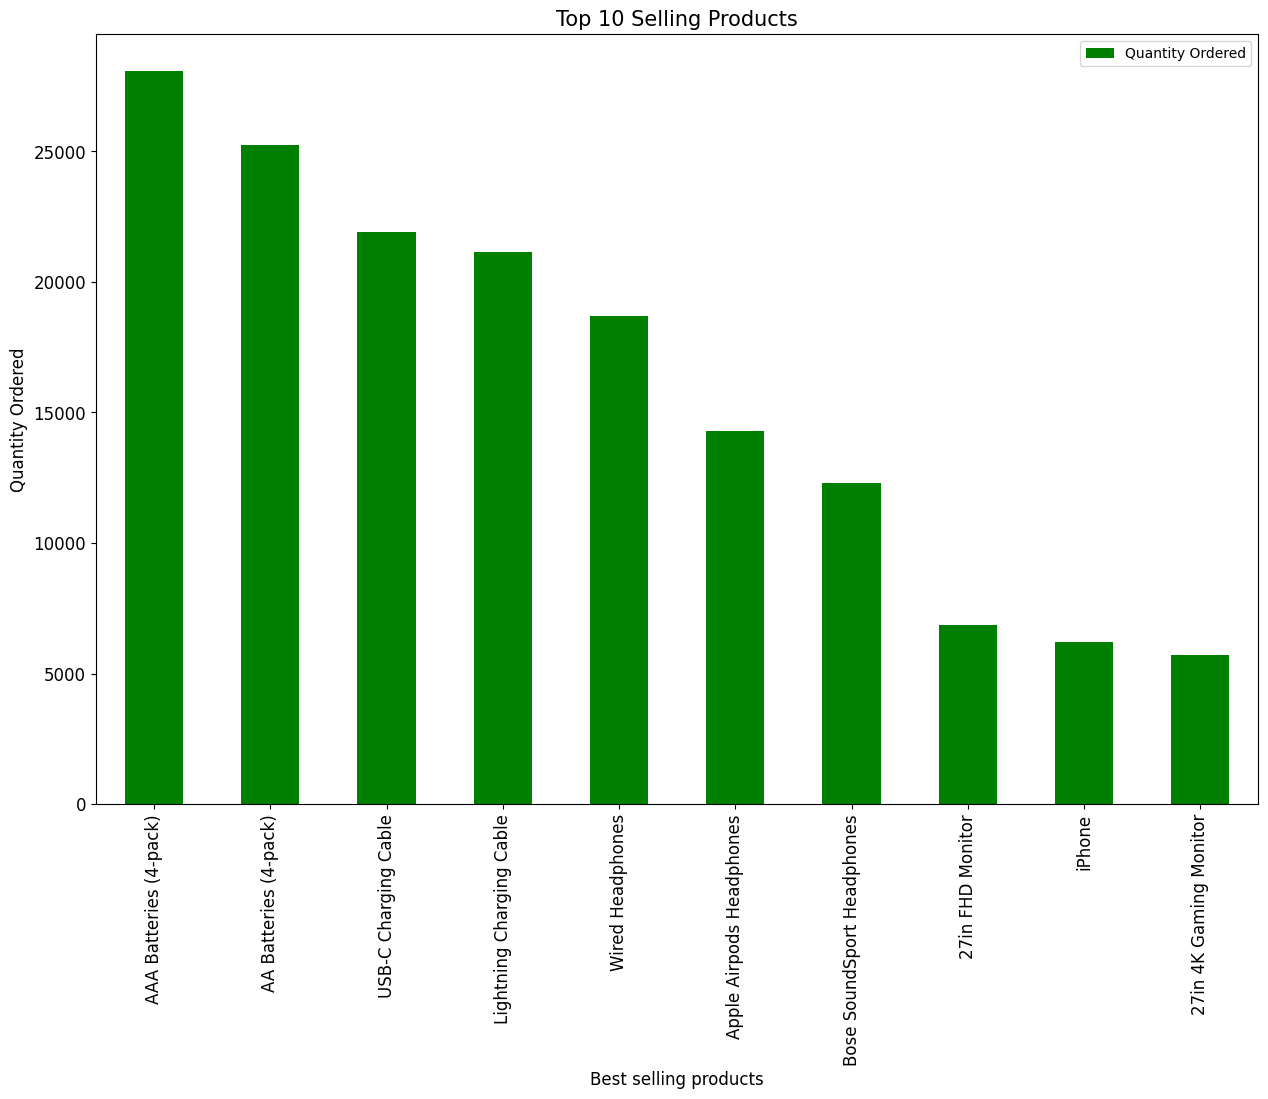

In [15]:
top.plot(kind = "bar", color = 'green', figsize = (15,10), fontsize = 12)
plt.title("Top 10 Selling Products", fontsize = 15)
plt.xlabel("Best selling products", fontsize = 12)
plt.ylabel("Quantity Ordered", fontsize = 12)
plt.show()

Best Sales generating products

In [16]:
bst = df.groupby('Product').sum().sort_values(by = 'Sales', ascending = False).reset_index()
bst = bst.drop(['Quantity Ordered', 'Price Each'], axis = 1)
best_sale = bst.head(10)

<ipython-input-16-609c0dcee487>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bst = df.groupby('Product').sum().sort_values(by = 'Sales', ascending = False).reset_index()


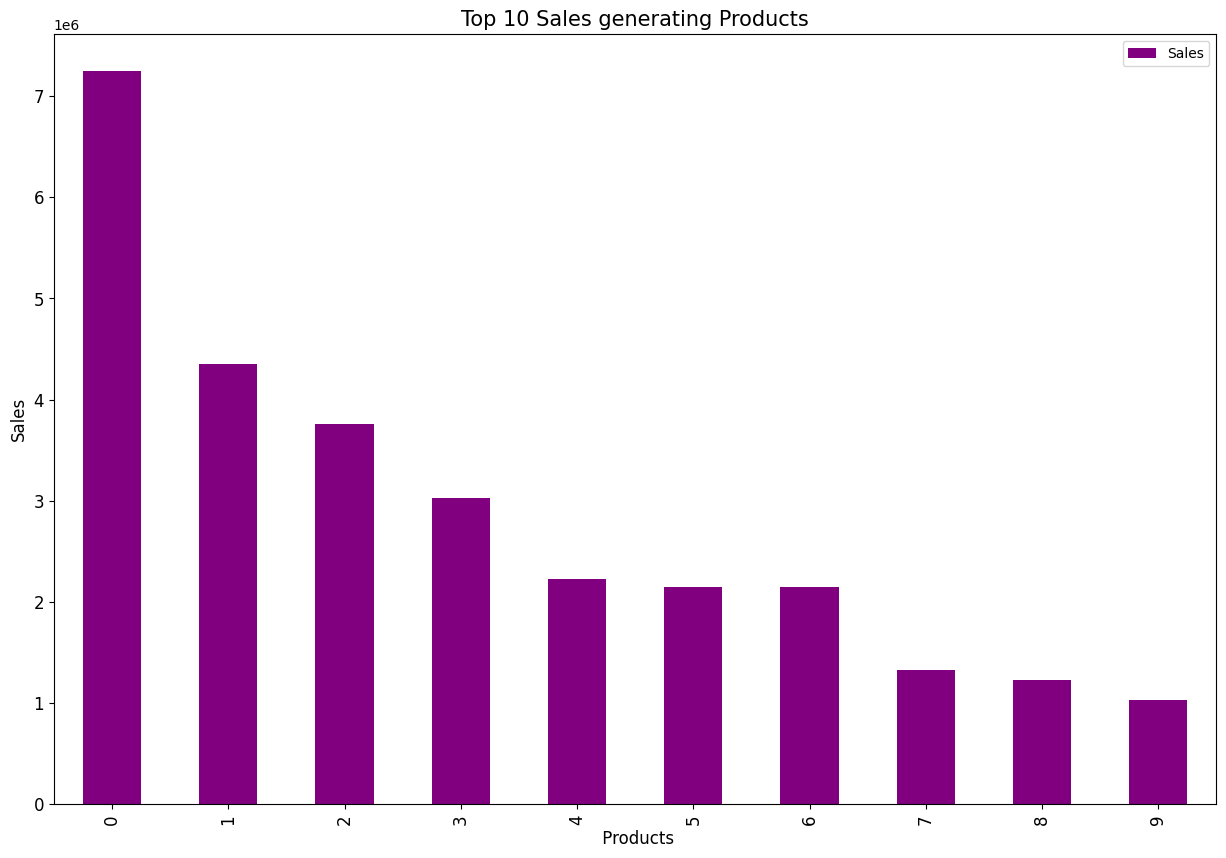

In [17]:
best_sale.plot(kind = "bar", color = 'purple', figsize = (15,10), fontsize = 12 )
plt.title("Top 10 Sales generating Products", fontsize = 15)
plt.xlabel(" Products", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()

Which city sells the most??

In [18]:
def get_city(address):
    return address.split(",")[1].strip(",")
df['City'] = df['Purchase Address'].apply((lambda x: get_city(x)))
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Sales,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01,700.00,Boston
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01,14.95,Portland
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01,23.98,San Francisco
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01,149.99,Los Angeles
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01,11.99,Austin


In [19]:
top_city = df.groupby('City').sum().sort_values(by = 'Sales', ascending = False)
top_city = top_city.drop(['Price Each', 'Quantity Ordered'], axis = 1)
top_city

<ipython-input-19-e480693126ea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  top_city = df.groupby('City').sum().sort_values(by = 'Sales', ascending = False)


,Sales
City,
San Francisco,7489884.16
Los Angeles,4952873.90
New York City,4227899.08
Boston,3333954.13
Atlanta,2556235.62
Seattle,2536251.19
Dallas,2501595.91
Portland,2089920.64
Austin,1658836.54


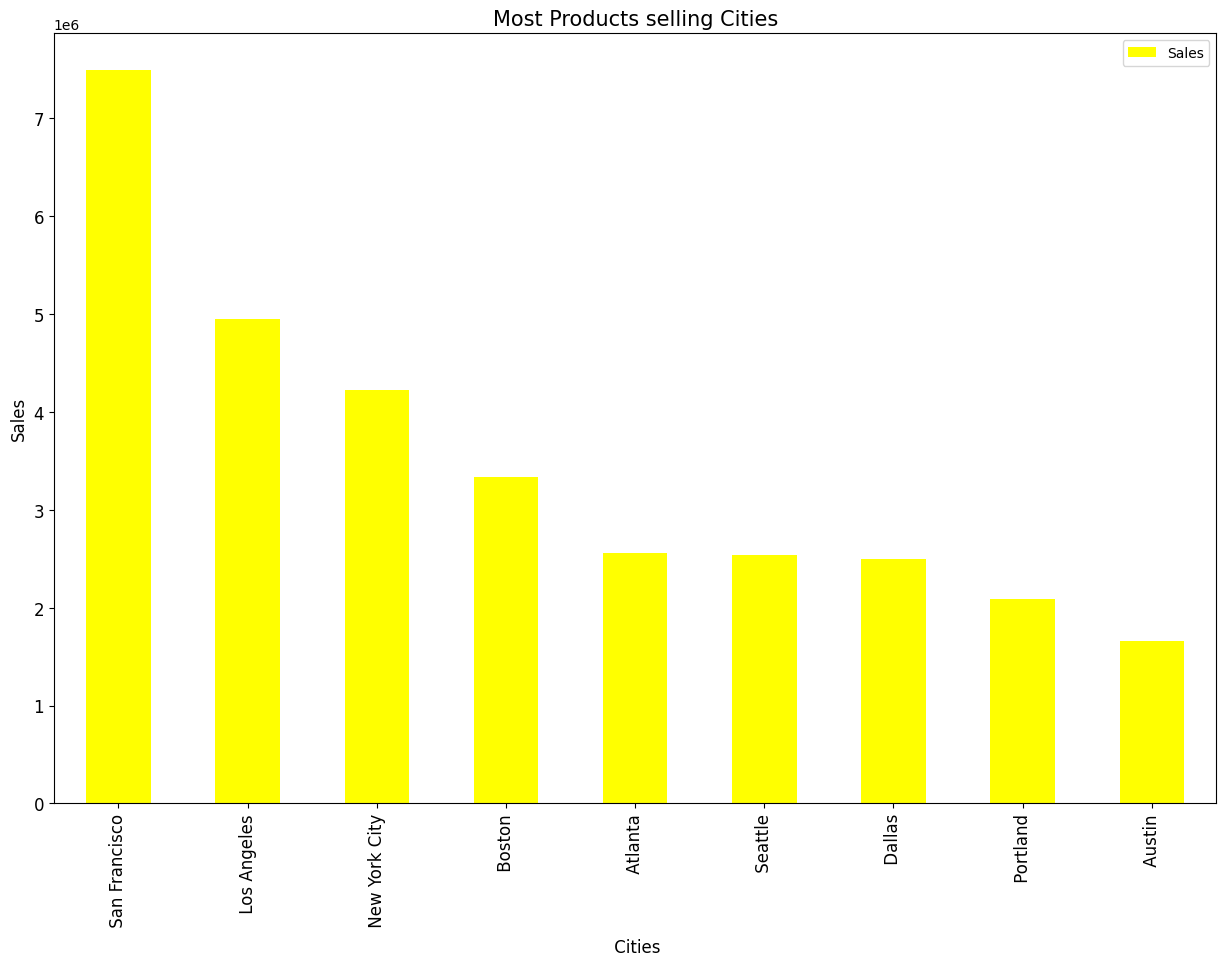

In [21]:
top_city.plot(kind = "bar", color = 'yellow', figsize = (15,10), fontsize = 12 )
plt.title("Most Products selling Cities", fontsize = 15)
plt.xlabel(" Cities", fontsize = 12)
plt.ylabel("Sales", fontsize = 12)
plt.show()